<a href="https://colab.research.google.com/github/BruceGabr/Neurokup-III/blob/main/notebooks/02_EDA_completo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!rm -rf ~/.kaggle           # Eliminar archivos antiguos
!rm -rf ~/.config/kaggle    # Eliminar configuraciones alternativas

import os
import json
for var in ['KAGGLE_USERNAME', 'KAGGLE_KEY', 'KAGGLE_API_TOKEN']:
    os.environ.pop(var, None)  # Eliminar variables de entorno viejas

In [2]:
!mkdir -p /root/.kaggle
!mv kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [3]:
# ========== 1. DEFINIR DIRECTORIO ==========
kaggle_dir = os.path.expanduser('~/.kaggle')
# ========== 3. CONFIGURACIÓN ==========
config = {
    "username": "brucemg",
    "key": "a09e6281740a6fe675766513592210d7"  # Reemplaza con tu key real
}

# Crear archivo NUEVO desde cero
with open(f'{kaggle_dir}/kaggle.json', 'w') as f:
    json.dump(config, f)

# Establecer variables de entorno NUEVAS
os.environ['KAGGLE_USERNAME'] = config['username']
os.environ['KAGGLE_KEY'] = config['key']

In [4]:
!kaggle config view

Configuration values from /root/.kaggle
- username: brucemg
- path: None
- proxy: None
- competition: None


In [5]:
!pip install -q kaggle

# Cargar datos

In [6]:
!kaggle competitions download -c neuro-kup-iii-beta
!unzip neuro-kup-iii-beta.zip

  0% 0.00/1.59M [00:00<?, ?B/s]
100% 1.59M/1.59M [00:00<00:00, 182MB/s]
Archive:  neuro-kup-iii-beta.zip
  inflating: sample_submission.csv   
  inflating: test_private.csv        
  inflating: test_public.csv         
  inflating: train.csv               


# Importar librerías

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from IPython.display import display
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# EDA Completo

In [9]:
"""
=================================================================
NOTEBOOK 02: ANÁLISIS EXPLORATORIO COMPLETO (EDA)
Objetivo: Entender profundamente los datos antes de modelar
=================================================================
"""
# Configuración de visualización
plt.style.use('default')
sns.set_palette("husl")
%matplotlib inline

### Leer datasets

In [10]:
train = pd.read_csv('train.csv')
test_public = pd.read_csv('test_public.csv')
test_private = pd.read_csv('test_private.csv')
print(f"train shape: {train.shape}")
print(f"test_public shape: {test_public.shape}")
print(f"test_private shape: {test_private.shape}")

train shape: (36168, 21)
test_public shape: (4521, 21)
test_private shape: (4522, 20)


### Visión general

In [12]:
# ========== 1. VISIÓN GENERAL ==========
print("\n" + "="*50)
print("INFORMACIÓN GENERAL")
print("="*50)

print("\n Primeras filas:")
display(train.head(10))

print("\n Info del dataset:")
train.info()

print("\n Estadísticas descriptivas:")
display(train.describe())

print("\n Columnas del dataset:")
print(f"Total columnas: {len(train.columns)}")
print(train.columns.tolist())


INFORMACIÓN GENERAL

 Primeras filas:


,id,nombre,apellido,DNI,año_nacimiento,trabajo,estado_civil,educación,riesgo_crediticio,fondos_promedio_anual,...,deuda_personal,incumplimiento,contacto,fecha,duracion,campaña,p_dias,contactos_previos,p_resultado,y
0,3344,Luís,Fábregas,23453705,1984,Obrero,"casado, con hijos",primaria,no,849.0,...,Falso,NO,Desconocido,15-may,1 m 12 s,1,nunca,0,desconocido,no
1,17965,Azucena,Céspedes,32916691,1976,técnico,"casado, sin hijos",primaria,no,1415.0,...,Falso,NO,CEL,30-jul,4 m 29 s,2,nunca,0,desconocido,no
2,18299,Teodora,Bautista,26597980,1983,administrador,"casado, con hijos",secundaria,no,3842.0,...,Falso,NO,CEL,31-jul,2 m 10 s,4,nunca,0,Desconocido,no
3,10221,Ainoa,Cabañas,29835829,1988,gestión,soltero,superios,no,-119.0,...,Falso,NO,desconocido,11-ene,6 m 15 s,11,nunca,0,desconocido,no
4,32192,Luis,Iriarte,15814698,1969,Obrero,"casado, con hijos",primaria,no,3498.0,...,Falso,NO,CEL,15-abr,4 m 24 s,2,nunca,0,desconocido,si
5,23098,Quirino,Echeverría,37652488,1986,técnico,soltero,secundaria,no,3867.0,...,Falso,NO,CEL,26-ago,4 m 17 s,12,nunca,0,desconocido,no
6,6633,Mónica,Mur,53284176,1995,gestión,soltero,superios,no,849.0,...,Falso,NO,desconocido,28-may,4 m 21 s,6,nunca,0,D,no
7,313,Gilberto,Lucas,26584016,1988,servicio,divorcio voluntario,secundaria,no,398.0,...,Verdadero,NO,desconocido,5-may,3 m 34 s,2,nunca,0,desconocido,no
8,12525,África,Saavedra,46654438,1999,servicios,"casado, sin hijos",secundaria,no,549.0,...,Falso,NO,desconocido,3-jul,2 m 29 s,1,nunca,0,Desconocido,no
9,44313,Ambrosio,Benavides,24096933,1970,técnico,"casado, con hijos",superior,no,1320.0,...,Falso,NO,CELL,28-jul,5 m 40 s,1,91,2,E,si



 Info del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36168 entries, 0 to 36167
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     36168 non-null  int64  
 1   nombre                 36168 non-null  object 
 2   apellido               36168 non-null  object 
 3   DNI                    36168 non-null  int64  
 4   año_nacimiento         36168 non-null  int64  
 5   trabajo                36168 non-null  object 
 6   estado_civil           36168 non-null  object 
 7   educación              36168 non-null  object 
 8   riesgo_crediticio      36168 non-null  object 
 9   fondos_promedio_anual  36168 non-null  float64
 10  hipoteca               36168 non-null  object 
 11  deuda_personal         36168 non-null  object 
 12  incumplimiento         36168 non-null  object 
 13  contacto               36168 non-null  object 
 14  fecha                  36168 non-n

,id,DNI,año_nacimiento,fondos_promedio_anual,campaña,contactos_previos
count,36168.000000,3.616800e+04,36168.000000,36168.000000,36168.000000,36168.000000
mean,22625.381719,3.661811e+07,1984.069177,1361.046146,2.765649,0.580264
std,13040.374915,1.445053e+07,10.618369,3023.083187,3.120193,2.370668
min,0.000000,1.000166e+07,1930.000000,-8019.000000,1.000000,0.000000
25%,11319.750000,2.556537e+07,1977.000000,70.000000,1.000000,0.000000
50%,22643.500000,3.513745e+07,1986.000000,447.000000,2.000000,0.000000
75%,33918.250000,4.724951e+07,1992.000000,1429.000000,3.000000,0.000000
max,45210.000000,7.999112e+07,2007.000000,102127.000000,63.000000,275.000000



 Columnas del dataset:
Total columnas: 21
['id', 'nombre', 'apellido', 'DNI', 'año_nacimiento', 'trabajo', 'estado_civil', 'educación', 'riesgo_crediticio', 'fondos_promedio_anual', 'hipoteca', 'deuda_personal', 'incumplimiento', 'contacto', 'fecha', 'duracion', 'campaña', 'p_dias', 'contactos_previos', 'p_resultado', 'y']


### Análisis del target


 ANÁLISIS DEL TARGET (y)

 Distribución del target:
y
no    31970
si     4198
Name: count, dtype: int64

 Porcentajes:
y
no    88.393055
si    11.606945
Name: proportion, dtype: float64


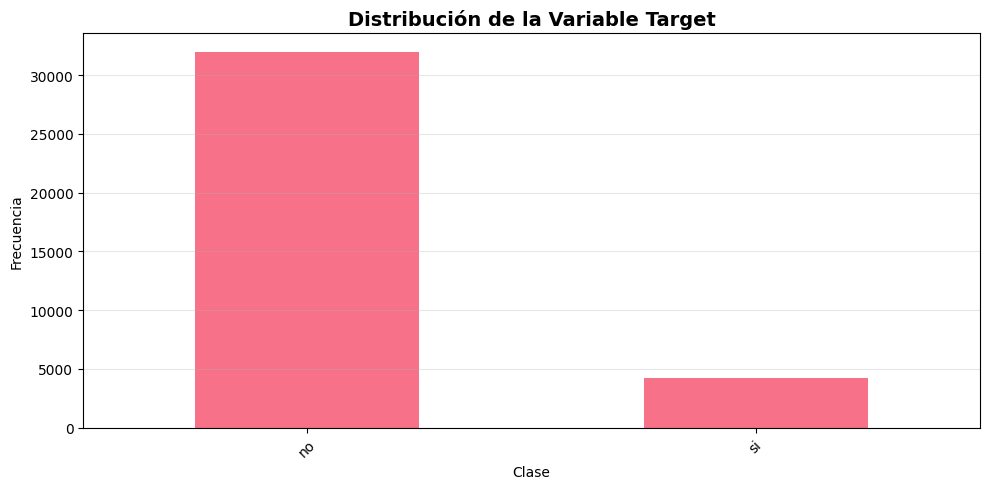


 Dataset DESBALANCEADO


In [16]:
# ========== 2. ANÁLISIS DEL TARGET ==========
print("\n" + "="*50)
print(" ANÁLISIS DEL TARGET (y)")
print("="*50)

print("\n Distribución del target:")
print(train['y'].value_counts())
print(f"\n Porcentajes:")
print(train['y'].value_counts(normalize=True) * 100)

# Visualizar distribución
plt.figure(figsize=(10, 5))
train['y'].value_counts().plot(kind='bar')
plt.title('Distribución de la Variable Target', fontsize=14, fontweight='bold')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Verificar balance
print(f"\n Dataset {'BALANCEADO' if train['y'].value_counts().max() / train['y'].value_counts().min() < 1.5 else 'DESBALANCEADO'}")

### Valores faltantes

In [17]:
# ========== 3. VALORES FALTANTES ==========
print("\n" + "="*50)
print(" VALORES FALTANTES")
print("="*50)

missing = train.isnull().sum()
missing_pct = (missing / len(train)) * 100
missing_df = pd.DataFrame({
    'Columna': missing.index,
    'Valores Faltantes': missing.values,
    'Porcentaje': missing_pct.values
})
missing_df = missing_df[missing_df['Valores Faltantes'] > 0].sort_values('Valores Faltantes', ascending=False)

if len(missing_df) > 0:
    print("\n⚠️ Columnas con valores faltantes:")
    display(missing_df)

    # Visualizar
    plt.figure(figsize=(12, 6))
    sns.barplot(data=missing_df, x='Columna', y='Porcentaje')
    plt.title('Porcentaje de Valores Faltantes por Columna', fontsize=14, fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Porcentaje (%)')
    plt.tight_layout()
    plt.show()
else:
    print("\n No hay valores faltantes en el dataset")


 VALORES FALTANTES

 No hay valores faltantes en el dataset


### Tipos de variables

In [18]:
# ========== 4. TIPOS DE VARIABLES ==========
print("\n" + "="*50)
print(" TIPOS DE VARIABLES")
print("="*50)

# Separar por tipo
numeric_cols = train.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = train.select_dtypes(include=['object']).columns.tolist()

# Quitar 'id' y 'y' si existen
if 'id' in numeric_cols:
    numeric_cols.remove('id')
if 'y' in categorical_cols:
    categorical_cols.remove('y')
if 'y' in numeric_cols:
    numeric_cols.remove('y')

print(f"\n Variables Numéricas ({len(numeric_cols)}):")
print(numeric_cols)

print(f"\n Variables Categóricas ({len(categorical_cols)}):")
print(categorical_cols)


 TIPOS DE VARIABLES

 Variables Numéricas (5):
['DNI', 'año_nacimiento', 'fondos_promedio_anual', 'campaña', 'contactos_previos']

 Variables Categóricas (14):
['nombre', 'apellido', 'trabajo', 'estado_civil', 'educación', 'riesgo_crediticio', 'hipoteca', 'deuda_personal', 'incumplimiento', 'contacto', 'fecha', 'duracion', 'p_dias', 'p_resultado']


### Análisis de variables numéricas



 ANÁLISIS DE VARIABLES NUMÉRICAS


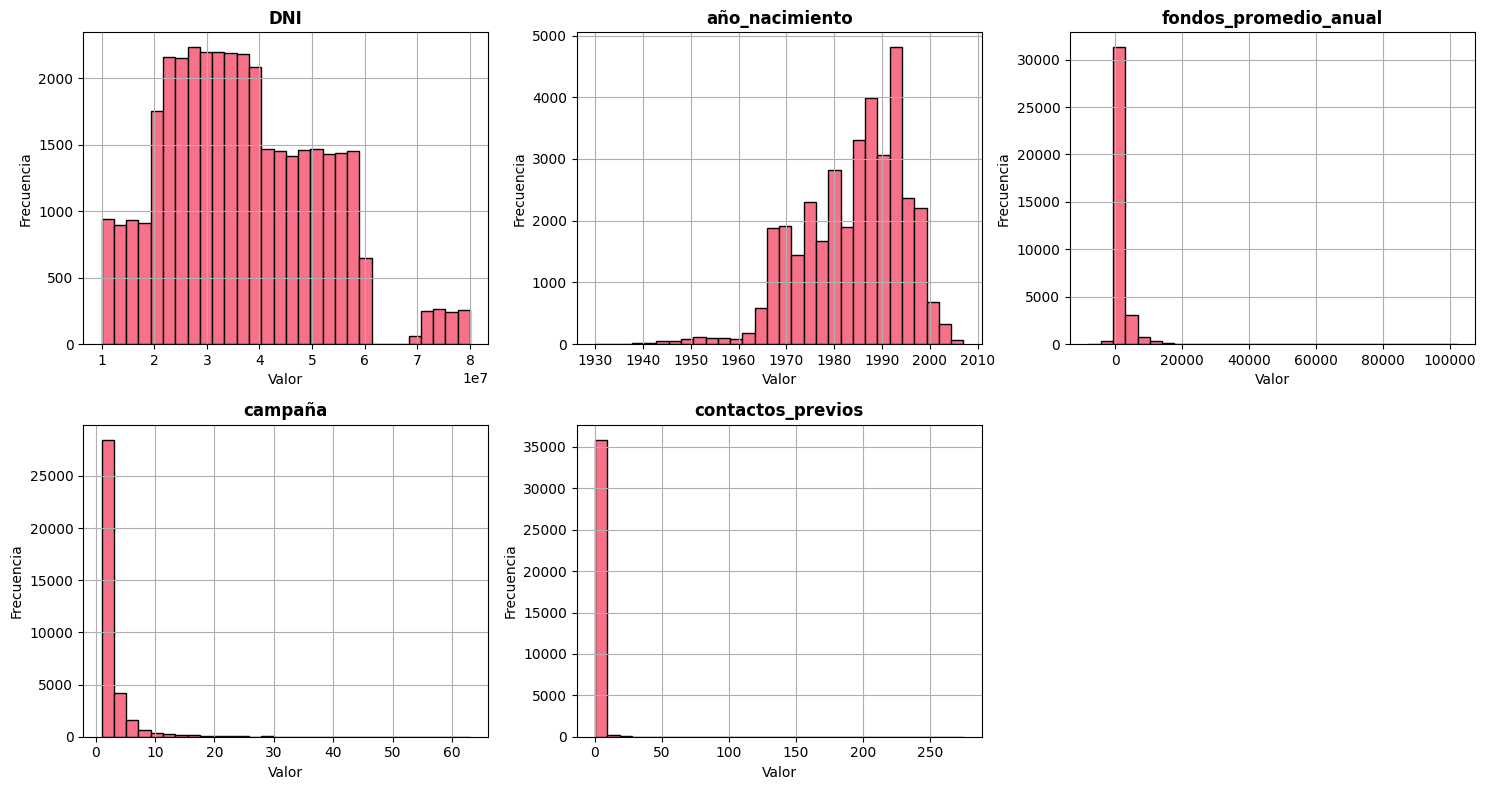


 Asimetría y Curtosis:


,Variable,Asimetría,Curtosis
0,DNI,0.449903,-0.155878
1,año_nacimiento,-0.682596,0.306194
2,fondos_promedio_anual,8.080110,130.740621
3,campaña,4.959564,40.137870
4,contactos_previos,46.682042,5004.786011



 Análisis de Outliers (Método IQR):
  DNI: 15 outliers (0.04%)
  año_nacimiento: 390 outliers (1.08%)
  fondos_promedio_anual: 3788 outliers (10.47%)
  campaña: 2467 outliers (6.82%)
  contactos_previos: 6612 outliers (18.28%)


In [19]:
# ========== 5. ANÁLISIS DE VARIABLES NUMÉRICAS ==========
print("\n" + "="*50)
print("\n ANÁLISIS DE VARIABLES NUMÉRICAS")
print("="*50)

if len(numeric_cols) > 0:
    # Distribuciones
    n_cols = 3
    n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
    axes = axes.flatten() if n_rows > 1 else [axes]

    for idx, col in enumerate(numeric_cols):
        if idx < len(axes):
            train[col].hist(bins=30, ax=axes[idx], edgecolor='black')
            axes[idx].set_title(f'{col}', fontweight='bold')
            axes[idx].set_xlabel('Valor')
            axes[idx].set_ylabel('Frecuencia')

    # Ocultar axes extras
    for idx in range(len(numeric_cols), len(axes)):
        axes[idx].axis('off')

    plt.tight_layout()
    plt.show()

    # Estadísticas de asimetría y curtosis
    print("\n Asimetría y Curtosis:")
    skew_kurt = pd.DataFrame({
        'Variable': numeric_cols,
        'Asimetría': [train[col].skew() for col in numeric_cols],
        'Curtosis': [train[col].kurtosis() for col in numeric_cols]
    })
    display(skew_kurt)

    # Outliers
    print("\n Análisis de Outliers (Método IQR):")
    for col in numeric_cols[:5]:  # Mostrar solo primeras 5
        Q1 = train[col].quantile(0.25)
        Q3 = train[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = ((train[col] < Q1 - 1.5*IQR) | (train[col] > Q3 + 1.5*IQR)).sum()
        pct = (outliers / len(train)) * 100
        print(f"  {col}: {outliers} outliers ({pct:.2f}%)")

### Análisis de variables categóricas


6️⃣ ANÁLISIS DE VARIABLES CATEGÓRICAS

📊 nombre:
nombre
Loreto      90
Cristian    81
Lupe        81
Manu        79
Amor        77
            ..
Alba        23
Lino        23
Aurelia     23
Rafaela     20
Estela      18
Name: count, Length: 934, dtype: int64
Valores únicos: 934

📊 apellido:
apellido
Jáuregui    55
Anaya       52
Fajardo     50
Guillén     50
Calvet      49
            ..
Clemente    19
Gallart     19
Ortuño      19
Sancho      19
Casanova    18
Name: count, Length: 1085, dtype: int64
Valores únicos: 1085

📊 trabajo:
trabajo
gestión            6716
técnico            4844
obrero             3923
Obrero             3883
Administrativo     1698
servicio           1681
servicios          1669
administrador      1233
administrativo     1206
experto técnico     965
desempleado         805
Gestión             784
emprendedor         612
Emprendedor         566
Autónomo            515
criada(o)           514
criado(a)           488
jubilado            465
retirado           

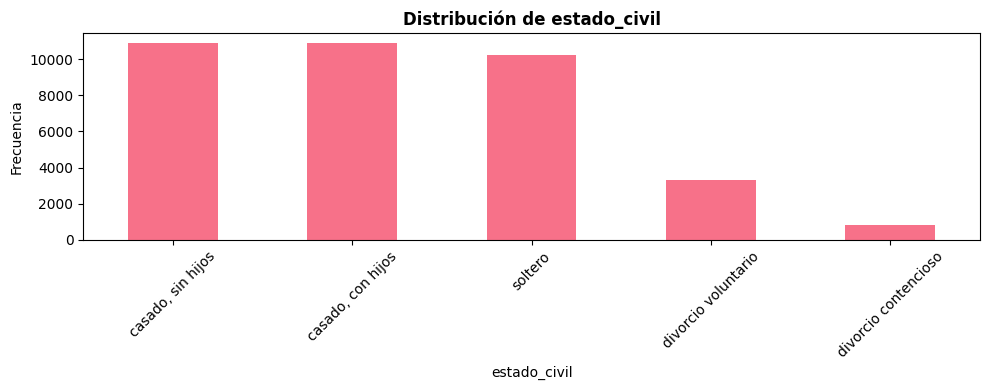


📊 educación:
educación
secundaria         9348
SECUNDARIA         9322
superior           8406
primaria           4928
superios           2133
primari@            548
SIN INFORMACIÓN     384
NO SE CONOCE        379
DESCONOCIDO         373
NO SE SABE          347
Name: count, dtype: int64
Valores únicos: 10


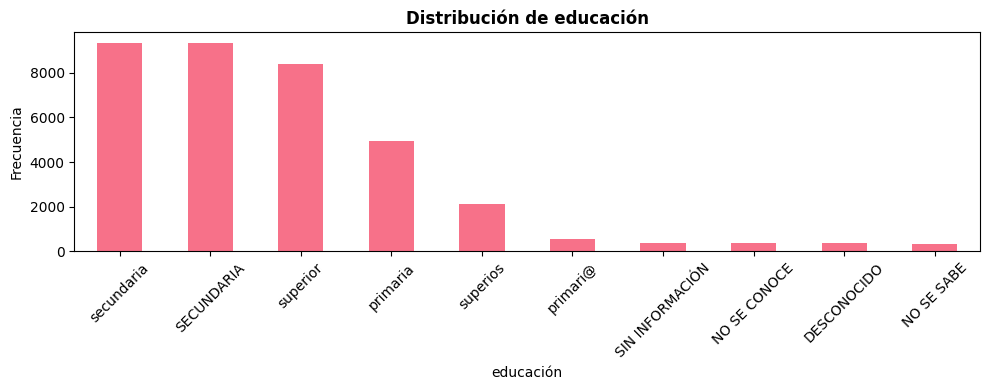


📊 riesgo_crediticio:
riesgo_crediticio
no    35491
sí      677
Name: count, dtype: int64
Valores únicos: 2


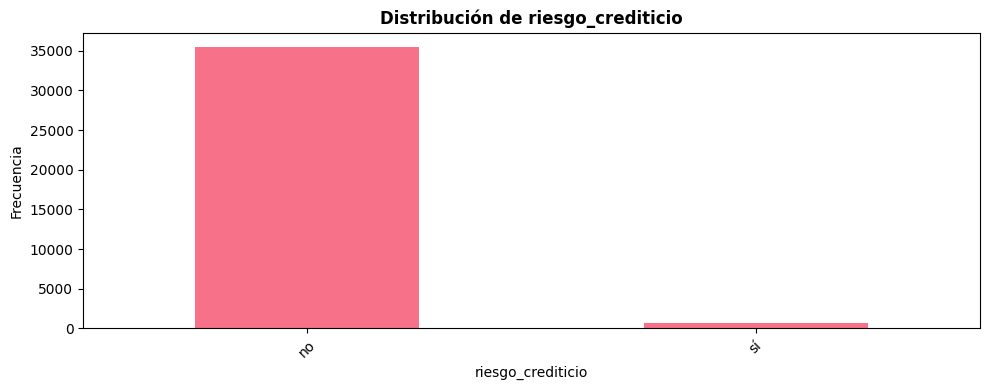


📊 hipoteca:
hipoteca
Sí    10083
sí    10052
No     8035
no     7998
Name: count, dtype: int64
Valores únicos: 4


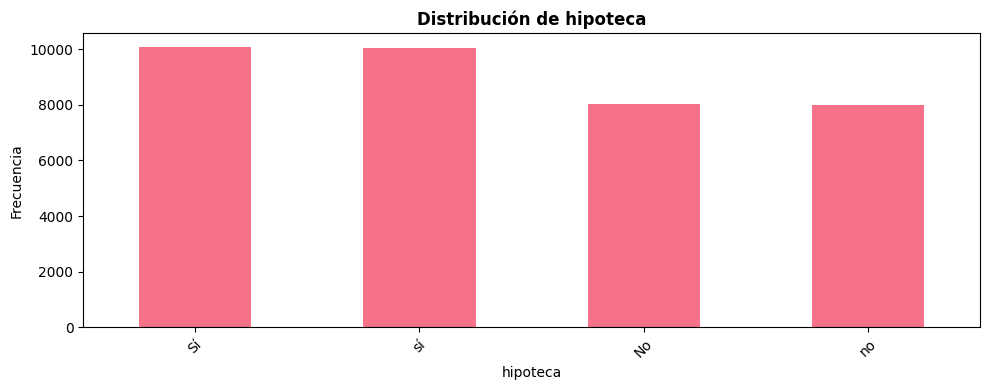


📊 deuda_personal:
deuda_personal
Falso        30333
Verdadero     5835
Name: count, dtype: int64
Valores únicos: 2


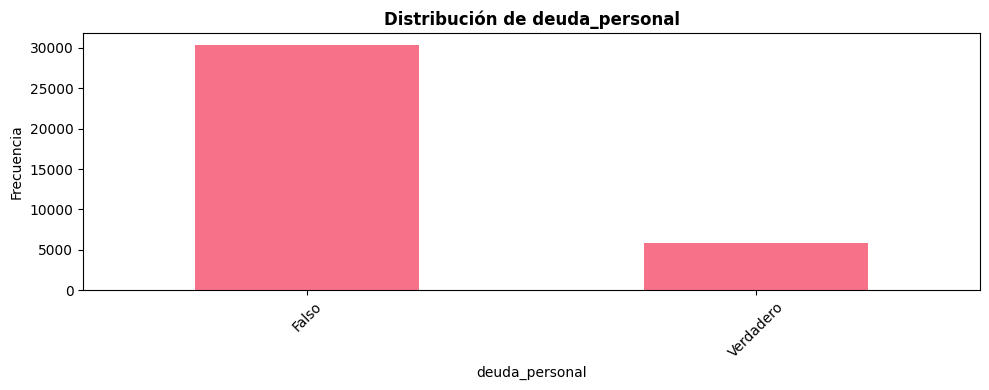


📊 incumplimiento:
incumplimiento
NO    35491
SÍ      677
Name: count, dtype: int64
Valores únicos: 2


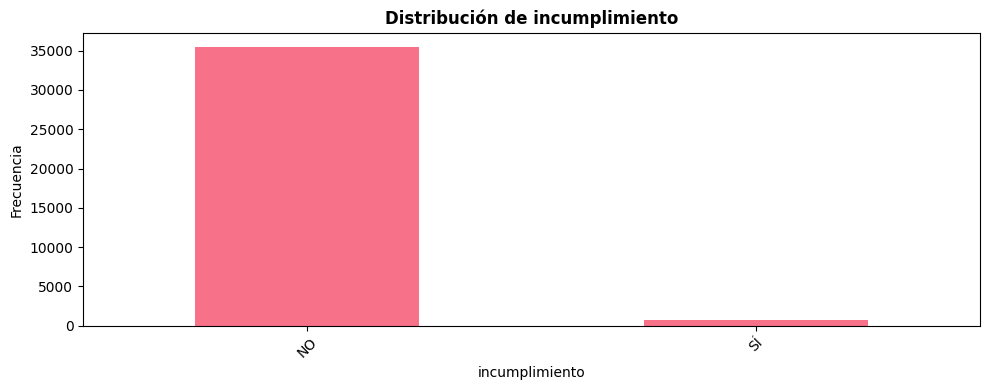


📊 contacto:
contacto
CELL           5981
CEL            5910
celular        5794
Celular        5779
Desconocido    5215
desconocido    5170
teléfono        787
TEL             771
Teléfono        761
Name: count, dtype: int64
Valores únicos: 9


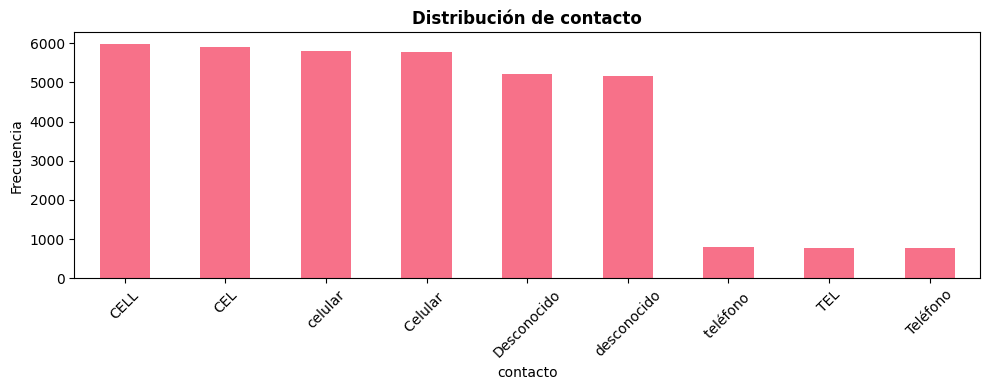


📊 fecha:
fecha
15-may    906
13-may    812
14-may    801
7-may     727
8-may     657
         ... 
22-jan      1
23-dic      1
22-nov      1
23-ago      1
27-dic      1
Name: count, Length: 315, dtype: int64
Valores únicos: 315

📊 duracion:
duracion
1 m 30 s     157
2 m 4 s      148
1 m 53 s     146
1 m 29 s     145
1 m 52 s     144
            ... 
21 m 3 s       1
23 m 7 s       1
30 m 9 s       1
22 m 22 s      1
21 m 59 s      1
Name: count, Length: 1493, dtype: int64
Valores únicos: 1493

📊 p_dias:
p_dias
nunca    29556
182        135
92         113
183        100
91          99
         ...  
428          1
382          1
437          1
690          1
774          1
Name: count, Length: 529, dtype: int64
Valores únicos: 529

📊 p_resultado:
p_resultado
Desconocido    9913
D              9890
desconocido    9757
F              1339
fracaso        1298
Fracaso        1264
O               510
Otro            506
otro            481
E               421
Éxito           416
éxito      

In [20]:
# ========== 6. ANÁLISIS DE VARIABLES CATEGÓRICAS ==========
print("\n" + "="*50)
print("6️⃣ ANÁLISIS DE VARIABLES CATEGÓRICAS")
print("="*50)

if len(categorical_cols) > 0:
    for col in categorical_cols:
        print(f"\n📊 {col}:")
        print(train[col].value_counts())
        print(f"Valores únicos: {train[col].nunique()}")

        # Si tiene pocas categorías, mostrar gráfico
        if train[col].nunique() <= 10:
            plt.figure(figsize=(10, 4))
            train[col].value_counts().plot(kind='bar')
            plt.title(f'Distribución de {col}', fontweight='bold')
            plt.xlabel(col)
            plt.ylabel('Frecuencia')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()


### Correlación con el target


CORRELACIÓN CON EL TARGET

 Correlaciones con el target:


,Variable,Correlación
4,contactos_previos,0.092051
3,campaña,-0.072571
2,fondos_promedio_anual,0.052518
1,año_nacimiento,-0.026684
0,DNI,0.012911


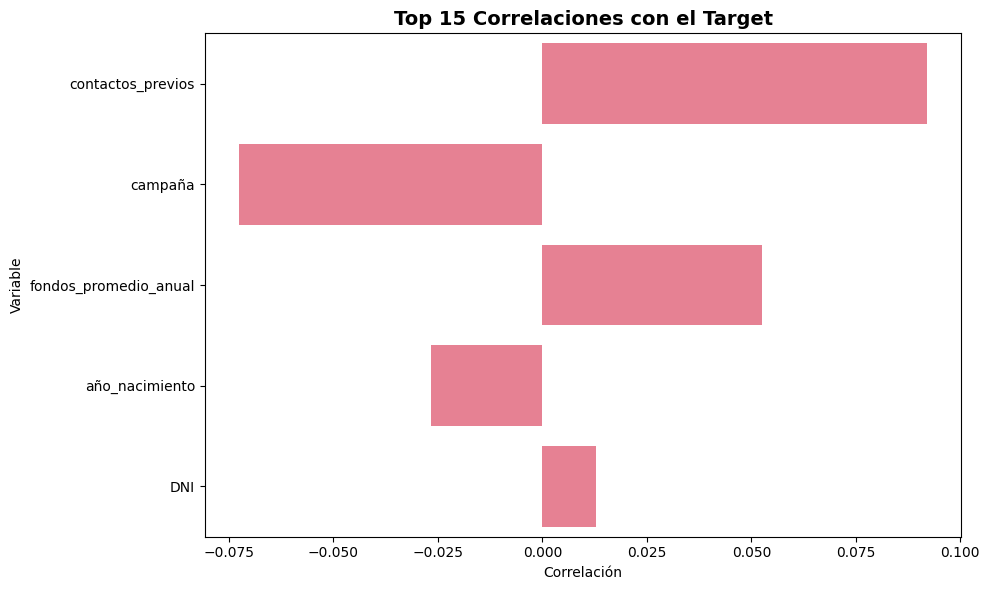

In [21]:
# ========== 7. CORRELACIÓN CON EL TARGET ==========
print("\n" + "="*50)
print("CORRELACIÓN CON EL TARGET")
print("="*50)

if len(numeric_cols) > 0:
    # Codificar el target si es categórico
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    y_encoded = le.fit_transform(train['y'])

    # Calcular correlaciones
    correlations = []
    for col in numeric_cols:
        corr = train[col].corr(pd.Series(y_encoded))
        correlations.append({'Variable': col, 'Correlación': corr})

    corr_df = pd.DataFrame(correlations).sort_values('Correlación', key=abs, ascending=False)

    print("\n Correlaciones con el target:")
    display(corr_df)

    # Visualizar top correlaciones
    plt.figure(figsize=(10, 6))
    sns.barplot(data=corr_df.head(15), x='Correlación', y='Variable')
    plt.title('Top 15 Correlaciones con el Target', fontsize=14, fontweight='bold')
    plt.xlabel('Correlación')
    plt.tight_layout()
    plt.show()

### Matriz de correlación


MATRIZ DE CORRELACIÓN ENTRE VARIABLES


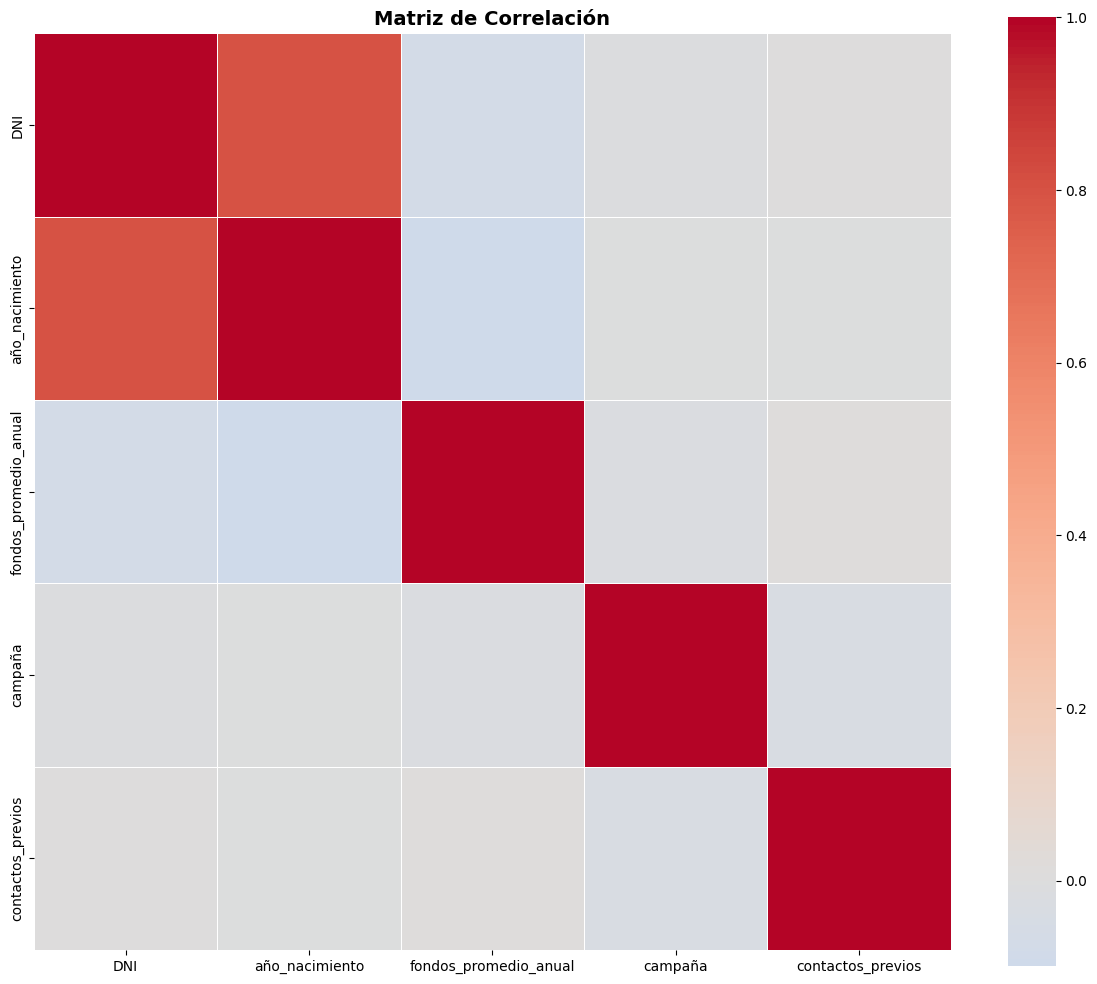


 Pares de variables con correlación alta (>0.8):
No hay correlaciones muy altas entre variables


In [22]:
# ========== 8. MATRIZ DE CORRELACIÓN ==========
print("\n" + "="*50)
print("MATRIZ DE CORRELACIÓN ENTRE VARIABLES")
print("="*50)

if len(numeric_cols) > 0:
    # Calcular correlación
    corr_matrix = train[numeric_cols].corr()

    # Visualizar
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0,
                square=True, linewidths=0.5)
    plt.title('Matriz de Correlación', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

    # Encontrar correlaciones altas
    print("\n Pares de variables con correlación alta (>0.8):")
    high_corr = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i, j]) > 0.8:
                high_corr.append({
                    'Var1': corr_matrix.columns[i],
                    'Var2': corr_matrix.columns[j],
                    'Correlación': corr_matrix.iloc[i, j]
                })

    if high_corr:
        display(pd.DataFrame(high_corr))
    else:
        print("No hay correlaciones muy altas entre variables")

In [24]:
# ========== 9. COMPARACIÓN TRAIN VS TEST ==========
print("\n" + "="*50)
print("9️⃣ COMPARACIÓN TRAIN VS TEST")
print("="*50)

print("\n📊 Verificando distribuciones similares:")
for col in numeric_cols[:5]:  # Primeras 5 variables
    print(f"\n{col}:")
    print(f"  Train - Media: {train[col].mean():.4f}, Std: {train[col].std():.4f}")
    print(f"  Test  - Media: {test_public[col].mean():.4f}, Std: {test_public[col].std():.4f}")


9️⃣ COMPARACIÓN TRAIN VS TEST

📊 Verificando distribuciones similares:

DNI:
  Train - Media: 36618109.2633, Std: 14450527.5754
  Test  - Media: 36376041.8799, Std: 14258526.2755

año_nacimiento:
  Train - Media: 1984.0692, Std: 10.6184
  Test  - Media: 1984.0049, Std: 10.4983

fondos_promedio_anual:
  Train - Media: 1361.0461, Std: 3023.0832
  Test  - Media: 1388.1055, Std: 3286.3287

campaña:
  Train - Media: 2.7656, Std: 3.1202
  Test  - Media: 2.6950, Std: 2.9182

contactos_previos:
  Train - Media: 0.5803, Std: 2.3707
  Test  - Media: 0.5486, Std: 2.0255


Resumen del EDA:
1. Dataset shape: {} samples, {} features
2. Target distribution: {}
3. Missing values: {}
4. Numeric features: {}
5. Categorical features: {}

Próximos pasos sugeridos:
1. Feature Engineering basado en correlaciones encontradas
2. Tratar outliers si los hay
3. Crear features de interacción
4. Probar modelos más complejos (RF, XGBoost, LightGBM)
5. Hacer feature selection

Ideas específicas para features:
- [ ] Crear interacciones entre variables correlacionadas
- [ ] Normalizar variables con alta asimetría
- [ ] Crear bins para variables continuas
- [ ] Agregar features polinomiales para variables importantes